<a href="https://colab.research.google.com/github/ericakitano/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**



- **Author:** Erica Kitano

## **Project Overview**


## **Load and Inspect Data**


### Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
filename = '/content/drive/MyDrive/Colab Notebooks/Raw Data Files/Project/sales_predictions.csv'
df = pd.read_csv(filename)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **Clean Data**


In [7]:
#1. Find the number of rows and columns:
df.shape


(8523, 12)

The dataframe has 8523 rows and 12 columns.

In [8]:
# 2. Find the datatypes of each variable:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
#3. Find duplicates and drop.

df.duplicated().sum()

0

There are no duplicates.

In [10]:
#4. Identify missing values.

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The ```Item_Weight``` column and ```Outlet_Size``` column contains rows with missing values.

In [11]:
#5. Fill in the missing values.

# Fill in the blanks with the median value for "Item_Weight"
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)

# Fill in the blanks with the word "Unknown" for "Outlet_Size".
df['Outlet_Size'].fillna('Unknown', inplace=True)

Justification: 

- [Item_Weight]: There are 1463 rows that are missing the "Item_Weight" values. That is too many rows to drop from the dataset because it is **more than 5%** of the total rows: 8523. I will fill it in with the median 'Item_Weight' **because `median` is less affected by outlier than `mean`.**
- [Outlet_Size]: There are 2410 rows that are missing the "Outlet_Size" values. That is too many rows to drop from the dataset because it is **more than 5%** of the total rows: 8523. I will fill it in with the word "Unknown" for now **because it is a categorical data, and we cannot use `mean`, `median`, or `mode` for this column.**



In [12]:
#6. Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
#7. Find and fix any inconsistent categories of data so that they are consistent.

#Output below for visibility of the different values under Item_Type to see if there are any inconsistencies:
df.groupby('Item_Type')['Item_Visibility'].mean()


Item_Type
Baking Goods             0.069169
Breads                   0.066255
Breakfast                0.085723
Canned                   0.068129
Dairy                    0.072427
Frozen Foods             0.065645
Fruits and Vegetables    0.068513
Hard Drinks              0.064943
Health and Hygiene       0.055216
Household                0.061322
Meat                     0.062284
Others                   0.060241
Seafood                  0.074976
Snack Foods              0.066850
Soft Drinks              0.063972
Starchy Foods            0.067564
Name: Item_Visibility, dtype: float64

There are no inconsistencies found in this column.

In [14]:
#7 continued.
#Output below for visibility of the different values under Item_Fat_Content to see if there are any inconsistencies:
df.groupby('Item_Fat_Content')['Item_Visibility'].mean()

Item_Fat_Content
LF         0.066628
Low Fat    0.064166
Regular    0.069564
low fat    0.065300
reg        0.066361
Name: Item_Visibility, dtype: float64

There are some inconsistences found in this column.

In [15]:
#7 continued.
#Fix the inconsistences.
df.replace({'LF' : 'Low Fat', 
            'low fat' : 'Low Fat',
            'reg' : 'Regular'}, inplace=True)

In [16]:
#Check that there are no more inconsistencies:
df.groupby('Item_Fat_Content')['Item_Visibility'].mean()

Item_Fat_Content
Low Fat    0.064330
Regular    0.069439
Name: Item_Visibility, dtype: float64

In [17]:
#8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [18]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Exploratory Data Analysis**

1. In order to study the data, we need to understand the distribution of various features in our dataset. I will use **Histogram** to see the distribution of `Item_Visibility`, `Item_MRP`, and `Item_Outlet_Sales`.

In [20]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np

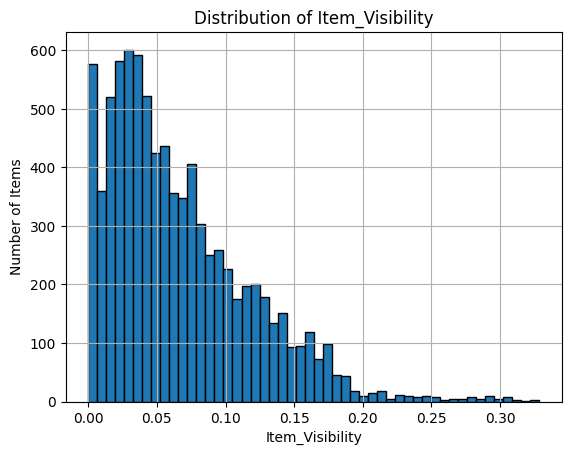

In [21]:
#Distribution of Item_Visibility
ax = df['Item_Visibility'].hist(bins = 'auto', edgecolor = 'black')
ax.set_title('Distribution of Item_Visibility')
ax.set_xlabel('Item_Visibility')
ax.set_ylabel('Number of Items');

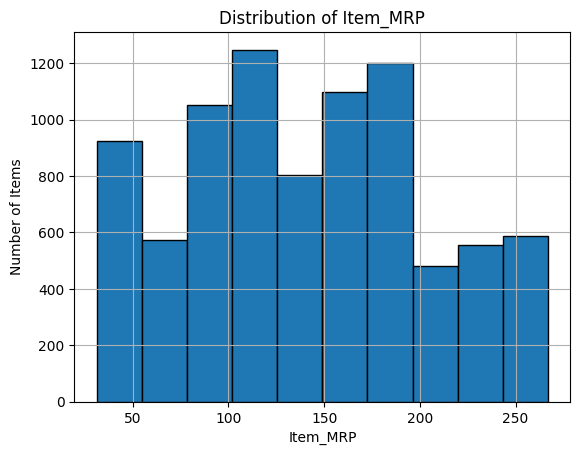

In [22]:
#Distribution of Item_MRP
ax = df['Item_MRP'].hist(bins = 10, edgecolor = 'black')
ax.set_title('Distribution of Item_MRP')
ax.set_xlabel('Item_MRP')
ax.set_ylabel('Number of Items');

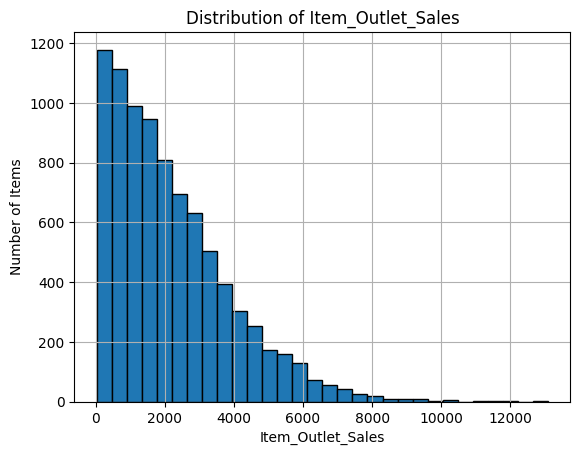

In [23]:
#Distribution of Item_Outlet_Sales
ax = df['Item_Outlet_Sales'].hist(bins = 30, edgecolor = 'black')
ax.set_title('Distribution of Item_Outlet_Sales')
ax.set_xlabel('Item_Outlet_Sales')
ax.set_ylabel('Number of Items');

2. Next, I will use **Boxplot** to view statistical summaries of various features of the dataset.

In [24]:
#import seaborn
import seaborn as sns

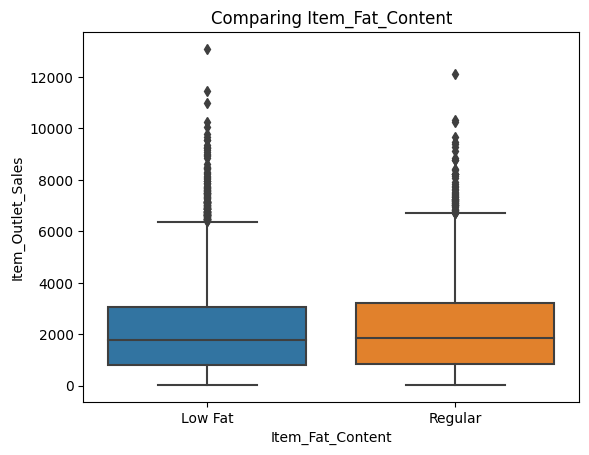

In [33]:
# Boxplot of Item_Outlet_Sales against Item_Fat_Content.
ax = sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Item_Fat_Content");

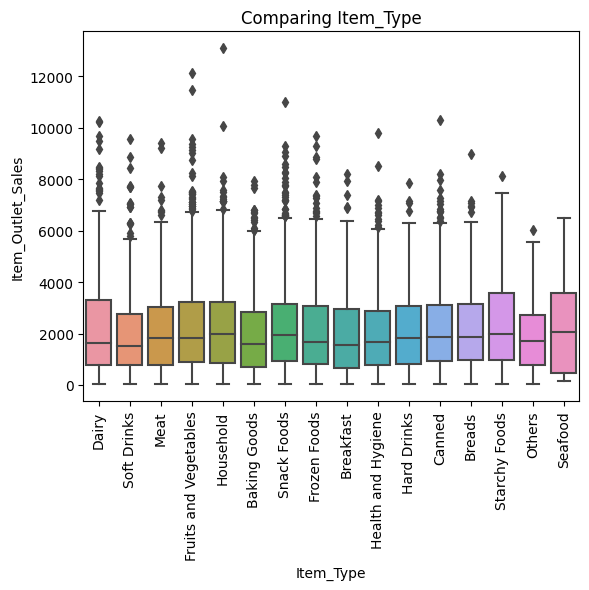

In [30]:
# Boxplot of Item_Outlet_Sales against Item_Type.
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis='x', rotation = 90)
ax.set_title("Comparing Item_Type");

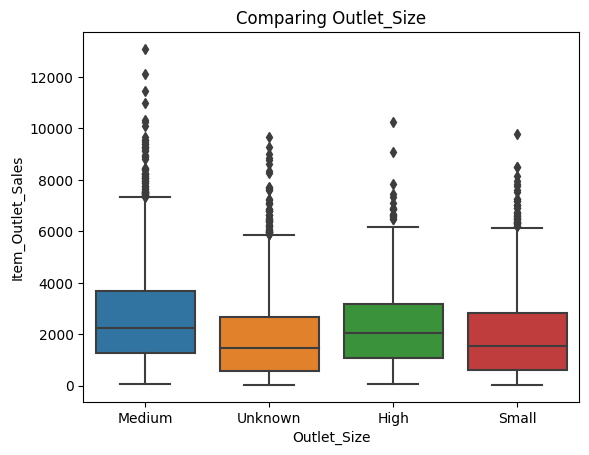

In [34]:
# Boxplot of Item_Outlet_Sales against Outlet_Size.
ax = sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
ax.set_title("Comparing Outlet_Size");

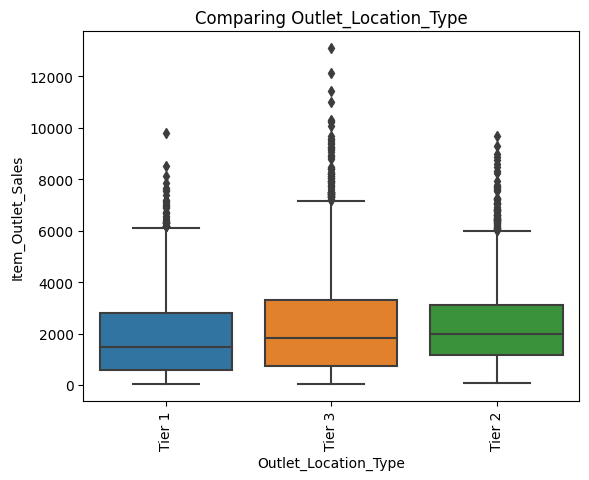

In [35]:
# Boxplot of Item_Outlet_Sales against Outlet_Location_Type.
ax = sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis='x', rotation = 90)
ax.set_title("Comparing Outlet_Location_Type");

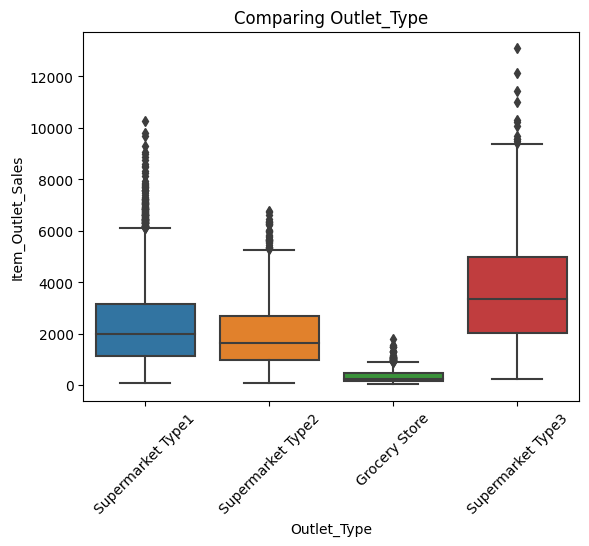

In [38]:
# Boxplot of Item_Outlet_Sales against Item_Type.
ax = sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
ax.tick_params(axis='x', rotation = 45)
ax.set_title("Comparing Outlet_Type");

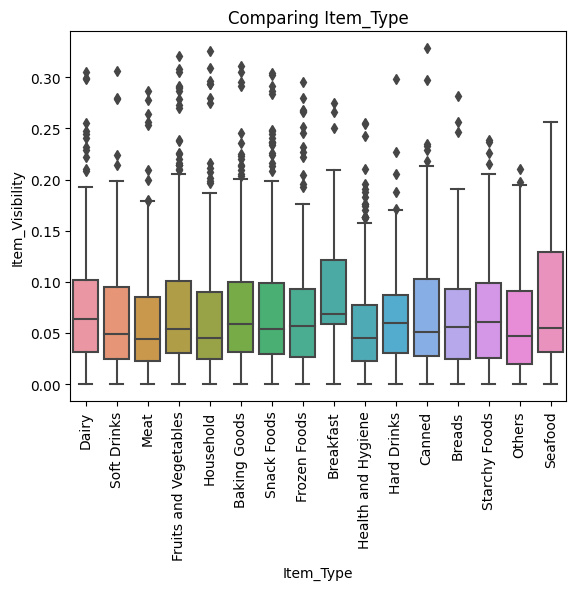

In [28]:
# Boxplot of Item_Visibility against Item_Type.
ax = sns.boxplot(x='Item_Type', y='Item_Visibility', data=df)
ax.tick_params(axis='x', rotation = 90)
ax.set_title("Comparing Item_Type");

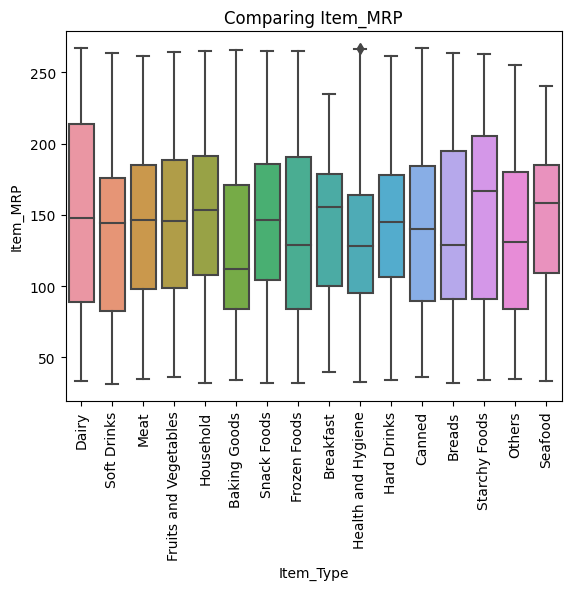

In [39]:
# Boxplot of Item_Type against Item_MRP.
ax = sns.boxplot(x='Item_Type', y='Item_MRP', data=df)
ax.tick_params(axis='x', rotation = 90)
ax.set_title("Comparing Item_MRP");

3. In order to predict `Item_Outlet_Sales`, we need to see which features are correlated with `Item_Outlet_Sales` so that they can be used to predict `Item_Outlet_Sales`. I will use **Heatmap** to see the correlation between features.

<Axes: >

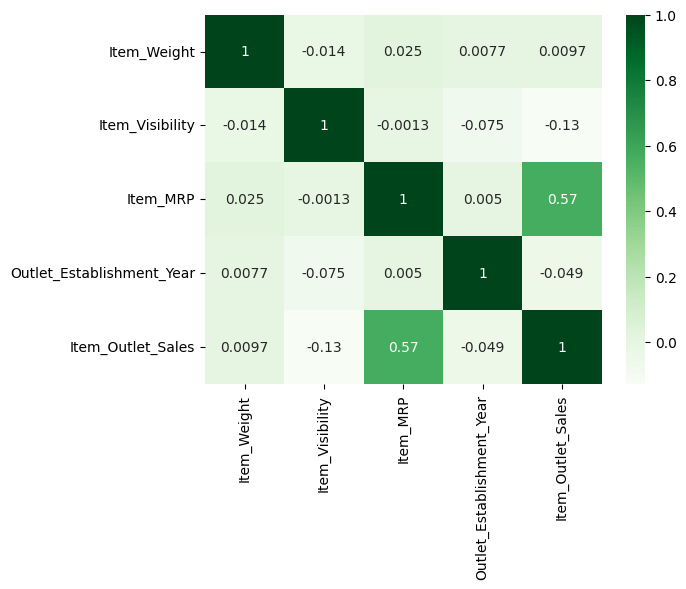

In [41]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

There is a moderate positive correlation between `Item_MRP` vs `Item_Outlet_Sales`.

## **Explanatory Data Analysis**